In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [13]:
corpus = """
United States Supreme Court LIPHAM v. GEORGIA, (1988) No. 87-6987 Argued: Decided: October 3, 1988
Rehearing Denied Nov. 28, 1988.
See 109 U.S. 517 .
On petition for writ of certiorari to the Supreme Court of Georgia.
The petition for a writ of certiorari is denied.
Justice MARSHALL, with whom Justice BRENNAN joins, dissenting.
Adhering to my view that the death penalty is in all circumstances cruel and unusual punishment prohibited by the Eighth and Fourteenth Amendments, Gregg v. Georgia, 428 U.S. 153, 231 , 2973, 49 L. Ed.2d 859 (1976) (MARSHALL, J., dissenting), I would grant the petition for writ of certiorari and vacate the death sentence in this case. [488 U.S. 873 , 874]   But even if I did not hold this view, I would still grant the petition and vacate the death sentence. Imposing the death penalty on petitioner is squarely inconsistent with this Court's decision in Caldwell v. Mississippi, 472 U.S. 320 (1985), where we held constitutionally unacceptable precisely the sorts of jury arguments employed by the Georgia prosecutor here.
Petitioner was convicted of murder, rape, armed robbery, and burglary, and was sentenced to death for the murder. In his opening statement at the sentencing phase, the prosecutor told the jury it had reached the phase of the proceedings where " 'you make the decision as to the punishment.' " Pet. for Cert. 5. But then he continued:
" 'But how did we get to right here? You got here because the district attorney, that's me, as the agent of the State[,] made the decision to seek the death penalty in this case. Not any of you all but by law the only person who can do that. So you didn't bring us here. No one else did. That was my decision and that's why you can choose not to impose the death penalty if you want to, for any reason or no reason whatsoever. But that decision seeking the death penalty was already made. So don't feel like it is yours and have it weigh too heavily on you because that was my decision.' " Id., at 5-6 ( emphasis added).
In his closing remarks, the prosecutor again informed the jury that " ' [y]ou are simply one more step in the procedure.' " He concluded by asserting that by comparison with the victim's suffering, the jury's decision was easy: " 'To infer or to interfere with justice by saying that your verdict of a proper punishment for William Anthony Lipham is only a life sentence is a joke. A very sad joke.' " Id., at 8.
Allowing petitioner's death sentence to stand cannot possibly be squared with Caldwell. In that case, we overturned the death sentence in a case in which the prosecutor had noted to the jury that " 'the decision you render is automatically reviewable by the Supreme Court.' " We stated there that "it is constitutionally impermissible to rest a death sentence on a determination made by a sentencer who has been led to believe that the responsibility for determining the appropriateness of the defendant's death rests elsewhere." 472 U.S., at 328 -329, 105 S.Ct. at 2639. The rationale for that holding was that jurors charged with deciding whether capital punish- [488 U.S. 873 , 875]   ment should be imposed should recognize that theirs is a " 'truly awesome responsibility' " and " 'act with due regard for the consequences of their decision. . . .' " Id., at 329-30 (quoting McGautha v. California, 402 U.S. 183, 208 , 1467 (1971 )). Dissipating this all-important sense of responsibility, we wrote, could easily result in the jury's deciding to " 'send a message' of extreme disapproval for the defendant's acts" without ever having determined that a death sentence was in order. 472 U.S., at 331 -332, 105 S.Ct. at 2641.
The prosecutor's statement here-admonishing the jurors not to " 'feel like it is you[r] [decision]' " and urging them not to " 'have it weigh too heavily on you because that was my decision' "-is designed for only one reason: to dissipate the jury's sense of personal responsibility for this most awesome of decisions. See, e.g., Tucker v. Kemp, 802 F.2d 1293 ( 11th Cir.1986) (en banc), (concluding that a "prosecutorial expertise" argument was impermissible under Caldwell where the prosecutor suggested that others, including the prosecutor and the police, bore partial responsibility for imposition of the death penalty) cert. denied, 480 U.S. 911 (1987).
Nor am I persuaded by the State's argument that petitioner is barred on direct appeal from raising his Caldwell claim either because of his failure to object at trial or because of his failure to object with more specificity on appeal below. In sanctioning the prosecutor's statement that deciding whether to execute petitioner should not " 'weigh heavily on you,' " the judge committed what can only be deemed a plain error. And in his brief to the Georgia Supreme Court, petitioner-though not complaining specifically that Caldwell had been violated-sought reversal generally because of the "inflammatory and prejudicial" argumentation of the prosecutor, a description which richly applies to the remarks quoted above.
I therefore dissent.
"""

In [14]:
def get_distinct_words(corpus):
    words = corpus.lower().split()
    return list(set(words))

def construct_co_occurrence_matrix(corpus, window_size=4):
    words = corpus.lower().split()
    distinct_words = get_distinct_words(corpus)
    word_to_index = {word: i for i, word in enumerate(distinct_words)}

    matrix_size = len(distinct_words)
    co_occurrence_matrix = np.zeros((matrix_size, matrix_size))

    for i in range(len(words)):
        center_word_index = word_to_index[words[i]]

        for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
            if i != j:
                context_word_index = word_to_index[words[j]]
                co_occurrence_matrix[center_word_index][context_word_index] += 1

    return co_occurrence_matrix, distinct_words

def dimensionality_reduction(co_occurrence_matrix, k=2):
    pca = PCA(n_components=k)
    embeddings = pca.fit_transform(co_occurrence_matrix)
    return embeddings

def plot_vectors(embeddings, words):
    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        plt.scatter(embeddings[i, 0], embeddings[i, 1], marker='o', color='b')
        plt.text(embeddings[i, 0] + 0.01, embeddings[i, 1] + 0.01, word)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Co-occurrence Word Embeddings')
    plt.show()

In [15]:
co_occurrence_matrix, distinct_words = construct_co_occurrence_matrix(corpus)
print(co_occurrence_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
print(distinct_words)

['id.,', 'believe', 'reversal', 'me,', 'denied', 'there', ".'", '2639.', 'imposed', 'squared', '"prosecutorial', 'including', "that's", "punishment.'", 'nor', 'their', 'court', 'no.', 'police,', 'can', 'view', 'made.', 'did.', 'my', '1293', 'still', 'for', "'act", 'object', 'proper', 'already', 'u.s.,', ')).', 'overturned', '873', 'specificity', 'partial', 'person', 'burglary,', 'regard', 'gregg', 'we', 'have', 'responsibility,', 'ever', 'georgia.', 'caldwell.', 'if', 'get', 'cert.', 'dissenting.', 'phase', 'concluded', 'october', 'cruel', 'on', 'having', 'but', 'whether', 'want', 'barred', 'held', 'disapproval', 'determined', 'that', "'to", '331', 'automatically', 'proceedings', 'suggested', 'richly', 'precisely', '428', 'easily', 'simply', 'see', 'awesome', 'seeking', 'punishment', 'due', 'a', 'has', 'bore', 'else', '105', 'charged', 'any', "court.'", 'decided:', 'adhering', 'what', 'argument', 'led', 'yours', 'hold', '328', 'most', 'unusual', 'kemp,', 'like', 'attorney,', '1988.', '

In [17]:
embeddings = dimensionality_reduction(co_occurrence_matrix)
print(embeddings)

[[-6.53921419e-01  8.99172640e-01]
 [-1.86829148e-01 -3.22101344e-01]
 [-4.91010590e-01 -7.10929697e-01]
 [ 1.39468373e-01 -1.13238677e+00]
 [-1.59996617e+00 -2.24461274e-01]
 [-1.03419570e+00  7.27847493e-01]
 [-1.27220634e+00 -3.52725585e-02]
 [-4.12234396e-01 -4.74566452e-01]
 [-1.34301910e+00  3.82721730e-01]
 [-1.11199120e+00  4.46764314e-01]
 [-1.10969614e+00  8.98662325e-01]
 [ 3.95425132e-01 -6.98199506e-01]
 [ 3.89179247e-01 -4.59961884e-01]
 [-1.13122517e-01 -3.69428309e-01]
 [-1.43144023e+00 -2.28454441e-01]
 [-4.05934624e-01 -9.00266694e-01]
 [ 5.21842849e-01 -1.22568427e+00]
 [-1.59371383e+00 -2.13128455e-01]
 [ 2.85888485e-01 -1.13763034e+00]
 [ 6.10849538e-01  2.55904834e-01]
 [-1.27624005e-01  1.46710444e-01]
 [-1.19125098e+00  3.29546856e-01]
 [-1.09252365e+00  4.41923641e-01]
 [ 1.59177946e+00  1.97270318e+00]
 [-1.58414507e+00 -1.60583264e-01]
 [-5.68894758e-01 -7.52099924e-01]
 [ 1.27718265e+01 -2.87245862e+00]
 [-7.88361955e-01  3.14149328e-01]
 [-8.52176436e-02 -3

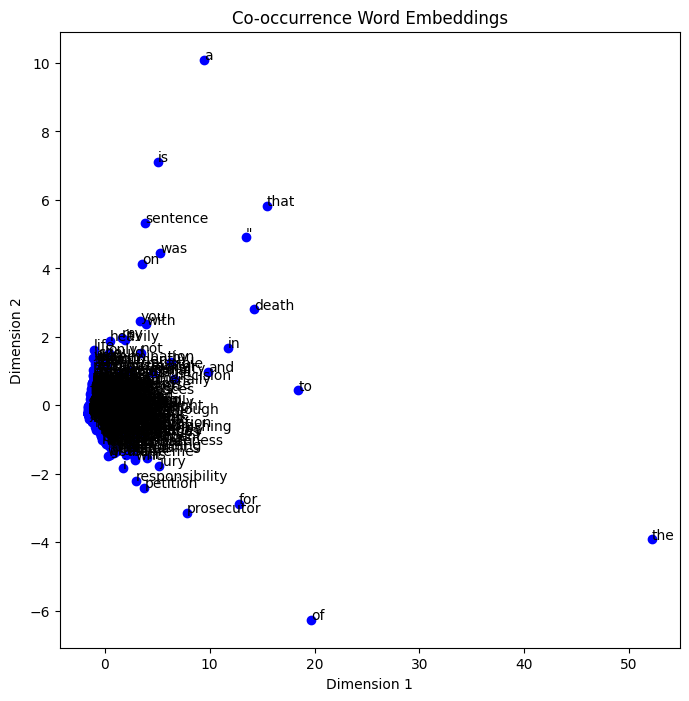

In [18]:
plot_vectors(embeddings, distinct_words)